# What Attributes create a great scorer in the NBA?

### Introduction

In a famous sport called Basketball, shooting is arguably the most important part of the game as it decides the win & loss. With a great passion towards Basketball, the following question sparked my curiosity: "What characteristics of the shot of NBA players make or break the shot?". To answer this question, the metrics like shooting arc to intricate details like release point of the shot needs to be explored. As a result, this allows Statisticians and Basketball players to distinguish beneficial, as well as harmful shooting habits through such analysis. I greatly hope that similar reports help enhance the performances of players to spread the artistic component of Basketball. As a player myself (not pro-level obviously), this report may help readers gain sense of what really makes or breaks your shot.

<h7> Technologies used: </h7>
- Python (Pandas) for data cleaning & wrangling
- SQL (MySQL) for further data analysis
- Seaborn library for exploratory visualzations

The following dataset (from Kaggle API) is a detailed collection of intersting metrics of the player's shots. The player-shooting file contains information about the player's shooting motion itself while the ball-path file contains the time-series data of the path of the ball takes. This creates 4 files which 2 of them are "made" shots and the other 2 are "missed" shots.

Columns used (player-metric):
- pid: Distinct player id
- fnm: First name
- lnm: Last name
- n: Shot taken
- bz: The z-coordinate of the hand when release
- rt: Release time
- rz: Z-coordinate of the ball when release
- mnvt: Time to reach min vel.
- mnv: Minimum vel.
- lr1t: Time when ball shifts from left to right
- rl1t: Time when ball shifts right to left
- plr: Relative arc

Columns used (ball-path):
- t: Time frame
- dz: Change in z-coord
- ca: Ball acceleration
- cv: Ball velocity

### 1. Import necessary libraries
The following are used for data analysis and file work mainly.

In [2]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.1 Install Kaggle
Installed Kaggle using pip command to use for API and other Kaggle features.

In [1]:
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Created a directory to store csv files from API.

In [14]:
%mkdir C:\Users\kangj\.kaggle\

The directory or file cannot be created.


Redirected kaggle.json file into the directory, necessary to retrieve Kaggle data.

In [22]:
%copy .\kaggle.json C:\Users\kangj\.kaggle\

        1 file(s) copied.


In [4]:
rel_path = "C:/Users/kangj/.kaggle/"

The !kaggle command (from the API) is used to retrieve bunch of datasets related to NBA player statistics. For the goal of this project, we will retrieve the most ideal one.

In [33]:
!kaggle datasets list -s "nba player shooting"

ref                                                             title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sumitrodatta/nba-aba-baa-stats                                  NBA Stats (1947-present)                           10MB  2024-04-15 16:26:02           6942        137  1.0              
jamiewelsh2/nba-player-salaries-2022-23-season                  NBA Player Salaries (2022-23 Season)               73KB  2023-10-07 15:11:33           3442         58  1.0              
paultimothymooney/nba-player-shooting-motions                   NBA Player Shooting Motions                        10MB  2021-01-25 18:02:28            115          5  0.88235295       
jamiewelsh2/nba-per-game-player-statistics-2022-2023-season     NBA Pe

Store the name of the dataset into a file.

In [39]:
name = "matthewjohnson14/nba-player-shooting-motions"

Usedthe kaggle command to explore all the files that comes with the dataset folder.

In [36]:
!kaggle datasets files name

name                          size  creationDate         
---------------------------  -----  -------------------  
path_detail_made.csv          27MB  2023-12-20 22:06:24  
player_metrics_open.csv      127KB  2023-12-20 22:06:24  
path_detail_open.csv          26MB  2023-12-20 22:06:24  
player_metrics.csv           126KB  2023-12-20 22:06:24  
player_metrics_miss.csv      126KB  2023-12-20 22:06:24  
path_detail_miss.csv          26MB  2023-12-20 22:06:24  
path_detail.csv               26MB  2023-12-20 22:06:24  
path_detail_defended.csv      27MB  2023-12-20 22:06:24  
player_metrics_defended.csv  122KB  2023-12-20 22:06:24  
player_metrics_made.csv      127KB  2023-12-20 22:06:24  


Used the download command to download the file.

In [37]:
!kaggle datasets download name

Dataset URL: https://www.kaggle.com/datasets/matthewjohnson14/nba-player-shooting-motions
License(s): unknown




  0%|          | 0.00/49.5M [00:00<?, ?B/s]
  2%|▏         | 1.00M/49.5M [00:00<00:08, 5.70MB/s]
  4%|▍         | 2.00M/49.5M [00:00<00:06, 7.58MB/s]
  8%|▊         | 4.00M/49.5M [00:00<00:05, 9.35MB/s]
 10%|█         | 5.00M/49.5M [00:00<00:04, 9.39MB/s]
 12%|█▏        | 6.00M/49.5M [00:00<00:04, 9.18MB/s]
 14%|█▍        | 7.00M/49.5M [00:00<00:05, 7.79MB/s]
 16%|█▌        | 8.00M/49.5M [00:01<00:06, 7.23MB/s]
 18%|█▊        | 9.00M/49.5M [00:01<00:07, 5.71MB/s]
 20%|██        | 10.0M/49.5M [00:01<00:06, 6.48MB/s]
 24%|██▍       | 12.0M/49.5M [00:01<00:05, 7.66MB/s]
 26%|██▋       | 13.0M/49.5M [00:01<00:04, 8.05MB/s]
 30%|███       | 15.0M/49.5M [00:02<00:04, 8.19MB/s]
 32%|███▏      | 16.0M/49.5M [00:02<00:04, 8.62MB/s]
 34%|███▍      | 17.0M/49.5M [00:02<00:04, 8.48MB/s]
 36%|███▋      | 18.0M/49.5M [00:02<00:03, 8.85MB/s]
 38%|███▊      | 19.0M/49.5M [00:02<00:03, 8.69MB/s]
 40%|████      | 20.0M/49.5M [00:02<00:03, 8.50MB/s]
 42%|████▏     | 21.0M/49.5M [00:02<00:03, 8.77MB/s]
 

Extracted the zipfile of all file contents that came from the API. Note that these files were automatically stored into the folder that .json file belonged to. 

In [50]:
with zipfile.ZipFile(r"C:\Users\kangj\.kaggle\nba-player-shooting-motions.zip", 'r') as file:
    file.extractall()

Read one of the file to check valid information for analysis exists.

In [5]:
#check that it is extracted
ls = os.listdir(rel_path)
print(ls)

['kaggle.json', 'nba-player-shooting-motions.zip', 'path_detail.csv', 'path_detail_defended.csv', 'path_detail_made.csv', 'path_detail_miss.csv', 'path_detail_open.csv', 'player_metrics.csv', 'player_metrics_defended.csv', 'player_metrics_made.csv', 'player_metrics_miss.csv', 'player_metrics_open.csv']


## 2. Data Cleaning & Wrangling

We will first wrangle the datasets & perform basic analysis to create meaningful columns and exploration, which will further extend to SQL.

<h3> 2.1 Reading Data </h3>
<p> The NBA shooting dataset (via Kaggle API) is in CSV format. The dataset contains the specific information about player characteristics as well as the path that their balls take (in a time-series format). This is split into made-shots and missed-shots which becomes 4 files in total and they are read by read_csv() function. </p>

In [13]:
made_player_p = pd.read_csv(rel_path+"player_metrics_made.csv")
missed_p = pd.read_csv(rel_path+"player_metrics_miss.csv")

missed_b = pd.read_csv(rel_path+"path_detail_miss.csv")
made_player_b = pd.read_csv(rel_path+"path_detail_made.csv")

<h3> 2.2 Wrangling </h3>

##### 2.2.1 Creating 'names' column

Created a name column that contains both first names and last names of players and remove the fnm and lnm columns. This makes it much easier to work with as we can view the names at once and join other tables (which we will later).

In [10]:
made_player_p["name"] = made_player_p["fnm"]+" "+made_player_p["lnm"]
made_player_p = made_player_p.drop(columns=["fnm", "lnm"])

missed_p["name"] = missed_p["fnm"]+" "+missed_p["lnm"]
missed_p = missed_p.drop(columns=["fnm", "lnm"])

In [11]:
made_player_p.head()

,pid,hght,n,bx,by,bz,rt,rx,ry,rz,...,rl1y,rl1z,rl2t,rl2x,rl2y,rl2z,pl,spl,plr,name
0,201935,77.0,1138,-0.188301,0.261251,3.407759,0.376,-0.009724,0.018318,8.168231,...,0.083910,6.982244,NaN,NaN,NaN,NaN,5.159005,4.770011,1.081550,James Harden
1,203081,74.0,1114,-0.203829,-0.114526,2.976263,0.378,0.000623,-0.001450,7.694068,...,0.268531,5.016066,NaN,NaN,NaN,NaN,5.063771,4.723586,1.072018,Damian Lillard
2,2772,80.0,942,0.094973,-0.040592,3.168317,0.436,-0.075815,-0.003552,8.524100,...,0.339848,4.302039,NaN,NaN,NaN,NaN,5.813509,5.358633,1.084887,Trevor Ariza
3,202083,76.0,920,-0.730036,0.199584,3.154288,0.372,-0.004414,-0.000733,7.482605,...,0.327046,4.241086,NaN,NaN,NaN,NaN,4.888613,4.393289,1.112746,Wesley Matthews
4,200768,72.0,886,0.458438,-0.121073,2.717203,0.462,-0.009921,-0.011221,7.975187,...,0.605427,4.105267,NaN,NaN,NaN,NaN,6.180054,5.279945,1.170477,Kyle Lowry


##### 2.2.2 Categorized missed & made shots
Created a status column to indicate whether or not the row contains the shot characteristics of "made" or "missed" shots.

In [12]:
made_player_p["status"] = 1

In [13]:
missed_p["status"] = 0

<p> Joined the player characteristics for "missed" and "made" shots. The rows were distinguished by status (made or missed) and this makes a cleaner table that contains all information. This makes it quite easier to compare the made and missed shot statistics. </p>

In [14]:
merged = pd.concat([made_player_p, missed_p])

##### 2.2.3 Rescaling

Re-scaled height from inches to feet for unit consensus. Since all other metrics are in feet, it only makes senseto re-scale this metric to feet.

In [16]:
merged["hght"] = merged["hght"]*0.0833333

##### 2.2.4 Calculating absolute shot angle via Kinematics
 
Through the calc_angle() function, I calculated the angle of each player's shot using a Kinematics formula that takes into account initial & final height, time and shooting velocity (assuming air friction is negligible). This calculation is somewhat more accurate than the "plr" column which is the proportion between straight line path and the actual shot path. 

Let's imagine 2 players are 5ft and 6ft tall respectively. If the 5ft player shoots a flat shot and the 6ft player shoots a decently arc-ed shot, there is still a chance that the plr is similar even though, the absolute angle of the 5ft is roughly the same or maybe higher than the 6ft player. This is because the "spl" is higher for the 6ft, so the 6ft player needs a much higher arc shot to have a "plr" greater or equal to someone shorter! Hence, we take absolute angle.

In [17]:
#try max-height appraoch but add players height
def calc_angle(y, y_0,  t, v_0):
    height_diff = y - y_0
    g=-9.8
    sint = (height_diff-(0.5*g*t**2))/(t*v_0)
    return np.arcsin(sint)*(180/np.pi)

merged["arc_angle"] = merged.apply(lambda x: calc_angle(10, x["hght"], x["rt"], x["rv"]), axis=1)

merged.sort_values(by="arc_angle").head()

C:\Users\kangj\AppData\Local\Temp\ipykernel_22440\374316082.py:6: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin(sint)*(180/np.pi)


,pid,hght,n,bx,by,bz,rt,rx,ry,rz,...,rl2t,rl2x,rl2y,rl2z,pl,spl,plr,name,status,arc_angle
31,201583,6.749997,606,-0.978204,-0.642407,3.376309,0.582,-0.032924,0.035091,8.183635,...,NaN,NaN,NaN,NaN,6.438592,4.946003,1.301777,Ryan Anderson,0,29.602757
172,203897,6.499997,222,0.176881,0.170759,3.186986,0.458,-0.031907,-0.001255,8.521937,...,NaN,NaN,NaN,NaN,6.014265,5.341805,1.125886,Zach LaVine,0,32.764774
183,2588,6.833331,204,-0.273533,0.289880,3.262486,0.468,-0.038654,0.005452,7.242857,...,NaN,NaN,NaN,NaN,4.500115,3.997427,1.125753,Matt Bonner,1,33.354648
167,202323,6.499997,230,0.831296,-0.390322,2.584940,0.432,-0.454487,0.081529,7.238700,...,NaN,NaN,NaN,NaN,5.298238,4.851120,1.092168,Evan Turner,0,33.823635
179,203086,6.999997,210,0.113668,-0.087351,3.121101,0.463,-0.044183,0.073655,8.436836,...,NaN,NaN,NaN,NaN,5.720037,5.320515,1.075091,Meyers Leonard,1,34.484145


##### 2.2.5 Categorizing arc angle 

Categorized the arc level for each players after GROUPING by "made" or "missed" shots. The categorization of arcs is a relative measure based on whether or not the player's arc is above or below quantiles.

In [18]:
q3_arc = merged.groupby("status").quantile(0.75, numeric_only=True)["arc_angle"].iloc[0]
q1_arc = merged.groupby("status").quantile(0.25, numeric_only=True)["arc_angle"].iloc[0]

def categorize_arc(a):
    if a >= q3_arc:
        return "High"
    elif a <= q1_arc:
        return "Low"
    else:
        return "Medium"
      
merged["arc"] = merged["arc_angle"].apply(categorize_arc)

<h5> Heatmap of important variables </h5>

Below is a heatmap figure of some interesting variables. To highlight, there seems to be a high positive correlation between max velocity time and release time, as well as max velocity time and the x-coordinate of the ball. We also see a medium level of correlation for release time and "plr" - relative arc of the ball, negative correlation between max velocity and max velocity time, and max velocity and release time. This emphasizes an important remark that will be discussed in the conclusion.

<Axes: >

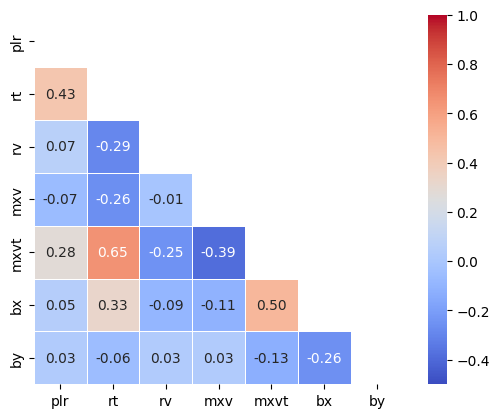

In [19]:
#Heatmap & Barplot
merged.head()
h = merged.copy()[["plr", "rt", "rv", "mxv", "mxvt", "bx", "by"]].corr()
mask = np.triu(np.ones_like(h, dtype=bool))
sns.heatmap(h, cmap='coolwarm', annot=True, vmin=-0.5, vmax=1, fmt=".2f", square=True, linewidths=0.5, mask=mask)

##### 2.2.6 Sampling players with high arc

Below are sampled players which have high arcs -- players who have shot-arc that higher than 75% of the NBA population.

In [20]:
#for validity of calculation!
high_arc_players = tuple(merged[merged["arc"] == "High"].sort_values(by="arc_angle", ascending=False)["name"].drop_duplicates().sample(10).values)
high_arc_players

('P.J. Tucker',
 'Michael Carter-Williams',
 'Kyle Lowry',
 'Isaiah Thomas',
 'Martell Webster',
 'Brandon Jennings',
 'Matt Barnes',
 'Kyle Singler',
 'Austin Rivers',
 'Tony Snell')

As seen in the list of high-arc players, some of the well-known players with high arc are Stephen Curr, Mike Conley and Mike Scott. Whether or not these players have high FG percentage will be analyzed later, but this gets us an idea of players with certain characteristics.

##### 2.2.7 Categorizing release time and jump distance

Wrote a categorize() function to distniguish players with fast, mid or slow release time on their shots based on the "rt" column. Similarly, categorization depends on being greater/less than IQR.

Applied the function to jump distancfe as well which is from the "rz" column, which measures the movement on the z-axis during release. This indicates how high the player jumps during the shot. 

In [21]:
q3_rt = merged.groupby("status").quantile(0.75, numeric_only=True)["rt"].iloc[0]
q1_rt = merged.groupby("status").quantile(0.25, numeric_only=True)["rt"].iloc[0]
q3_jt = merged.groupby("status").quantile(0.75, numeric_only=True)["rz"].iloc[0]
q1_jt = merged.groupby("status").quantile(0.25, numeric_only=True)["rz"].iloc[0]

def categorize(a,x,y):
    if a >= x:
        return "3"
    elif a <= y:
        return "1"
    else:
        return "2"
      
merged["Release"] = merged["rt"].apply(lambda x: categorize(x, q3_rt, q1_rt))
      
merged["jump_dist"] = merged["rz"].apply(lambda x: categorize(x, q3_jt, q1_jt))

##### 2.2.8  Pivot table
Created an approximate height column to distinguish heights into parts (i.e. players on the shorter-end + taller-end). Created a pivot table to look at heights and arc with values being "rv" column which indicates the release velocity.

In [22]:
center = 0
merged["approx_h"] = np.round(merged["hght"], 1)
table = pd.pivot_table(merged,index=["approx_h"], values="rv", columns=["arc"], aggfunc="median")
table

arc,High,Low,Medium
approx_h,,,
5.7,12.417396,NaN,NaN
5.8,NaN,NaN,14.078587
5.9,13.757844,NaN,NaN
6.0,13.343654,14.656401,14.215273
6.1,14.134940,16.024046,15.248237
6.2,13.570324,17.453921,14.442019
6.3,12.878195,NaN,15.275244
6.4,12.795762,16.601583,13.887613
6.5,13.077039,15.515003,14.345421


<h5> Exploring shooting velocity for different heights </h5>

The barplot figure shows the release velocity for different heights (rounded to 2nd decimals) seperated by arc-level. Release velocity is proportional to acceleration and thus to force of the shot. We will explore how shooting force differs (in general) for different heights.

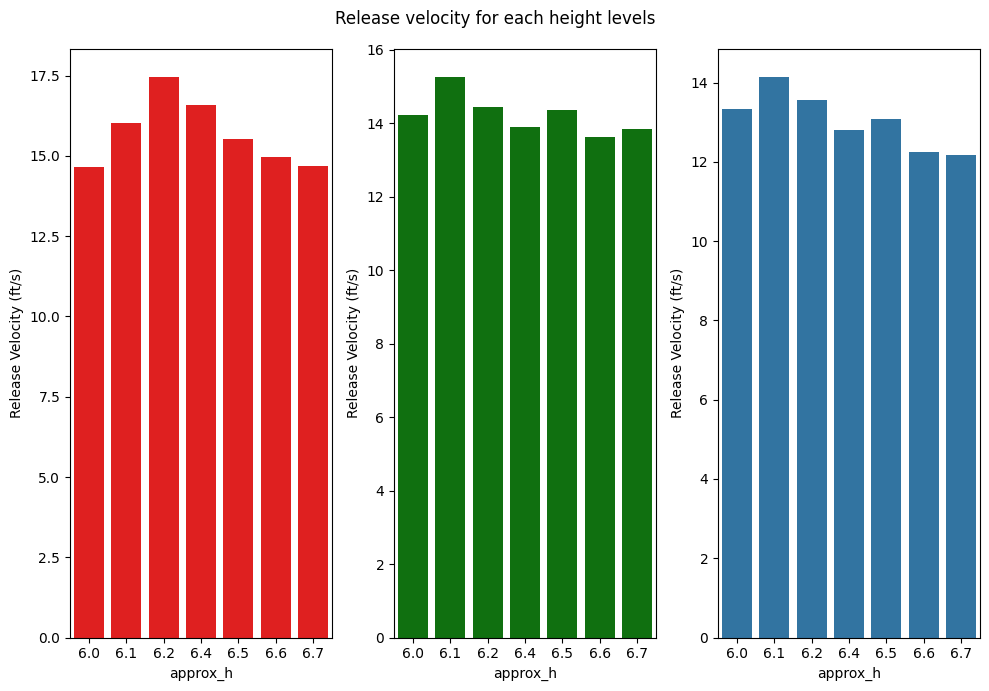

In [23]:
fig,ax=plt.subplots(1,3, figsize=(10,7))
t = table.reset_index().dropna()
sns.barplot(data=t, x=t["approx_h"], y=t["Low"],ax=ax[0], color="red")
sns.barplot(data=t, x=t["approx_h"], y=t["Medium"],ax=ax[1], color="green")
sns.barplot(data=t, x=t["approx_h"], y=t["High"],ax=ax[2])
ax[0].set_ylabel("Release Velocity (ft/s)")
ax[1].set_ylabel("Release Velocity (ft/s)")
ax[2].set_ylabel("Release Velocity (ft/s)")
plt.suptitle("Release velocity for each height levels")
plt.tight_layout()

As you can see above, for the low-arc shooters (red), players who are 6.1 to 6.4 tall shoot with the highest power. For medium-arc shooters (green) 6.1ft players shoot with the most power but there is no clear pattern. Lastly, the high-arc shooters on the shorter-end of height again shoot with the most velocity. This gives us an interesting remark which will be discussed later.

##### 2.2.9 The average location of the shoot pocket for each arc. </h5>

In [24]:
merged[["arc", "bx"]].groupby("arc").median()

,bx
arc,
High,-0.019838
Low,-0.096571
Medium,-0.120107


##### 2.2.10 Count players based on their shooting release time. 

In [25]:
merged["Release"].value_counts()

Release
2    193
3     99
1     86
Name: count, dtype: int64

#### Histogram of player counts

Below is a histogram that visualizes the information for the table #11. By far, most NBA players have "normal" release time with slightly higher number of players that have faster release. This highlights 2 important questions: Is it the BEST to shoot with a normal release time (not too slow, but not too fast)? & Is faster shooting form on the rise -- is it better?

Text(0.5, 1.0, 'Counts of players with release time levels')

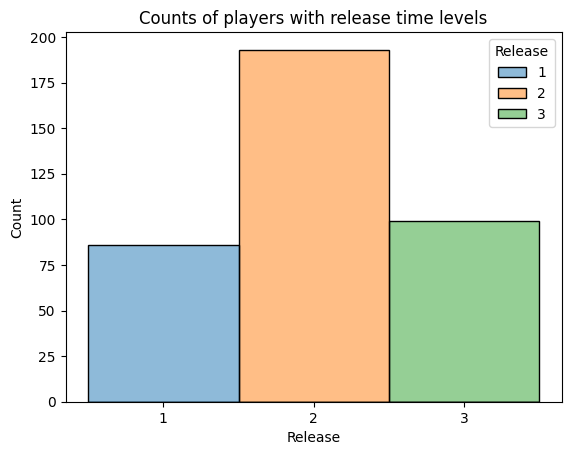

In [26]:
sns.histplot(data=merged, x="Release",hue="Release")
plt.title("Counts of players with release time levels")

##### 2.2.11 Exploring jump distance

Let's explore how high height of players with various jump distances. According to the data, players who are shorter (~6.2ft) jump the lowest while players who are around 6.5ft tall (taller guards/forwards) jump the highest. This is a somewhat surprising result since you would think that taller players jump less. But, if you think about Stephen Curry (6.2ft) Ray Allen (6.5ft), it is somewhat convincing.

In [27]:
merged[merged["jump_dist"].isin(["1","3"])][["jump_dist","hght"]].groupby("jump_dist").mean()

,hght
jump_dist,
1,6.281744
3,6.565474


##### 2.2.13 Measuring the x-coordinate change at highest arc

Imagine you are shooting a basketball. You have probably noticed that not all players have a striaght shot curvature -- more specifically -- in their perspective, the ball might not go straight in respect to the hand of release in the air! This is indicated by the x-coordinate change and we will measure this when the ball reaches its highest point. 
The goal of this finding is to see whether or not there is a pattern involving x-coordinate change of the ball path for good and bad shooters. 

To do so, we
1. Filter the rows such that the time goes up to the minimum velocity time.
2. Then find the difference of sum of the "cx" -- left/right coordinate.
3. Then, join the missed & made tables together for comparison.

REMARK:
- dx_at_top_x: x-coordinate change (made)
- dx_at_top_y: x-coordinate change (missed)

In [14]:
made_player_b = made_player_b.merge(made_player_p, on="pid")
missed_b = missed_b.merge(missed_p, on="pid")

In [15]:
made_player_b = made_player_b[made_player_b["t"] <= made_player_b["mnvt"]]
missed_b = missed_b[missed_b["t"] <= missed_b["mnvt"]]

In [16]:
made_player_b["dx_at_top"] = made_player_b[["cx"]].diff().expanding().sum()
missed_b["dx_at_top"] = missed_b[["cx"]].diff().expanding().sum()

In [18]:
dx_made = made_player_b[["dx_at_top", "t", "fnm_x", "lnm_x", "pid", "mnvt"]][made_player_b["t"] == made_player_b["mnvt"]].sort_values(by=["dx_at_top"])
dx_made["dx_at_top"] = dx_made["dx_at_top"].round(2)

In [19]:
dx_miss = missed_b[["dx_at_top", "t", "fnm_x", "lnm_x","pid", "mnvt"]][missed_b["t"] == missed_b["mnvt"]].sort_values(by=["dx_at_top"])
dx_miss["dx_at_top"] = dx_miss["dx_at_top"].round(2)

In [24]:
cols = ["dx_at_top_x", "dx_at_top_y", "fnm_x", "lnm_x"]
j = dx_made.merge(dx_miss, on=["pid", "fnm_x", "lnm_x"], how="inner")

In [25]:
j.query("lnm_x=='Smart'")[cols]

,dx_at_top_x,dx_at_top_y,fnm_x,lnm_x
146,0.71,0.58,Marcus,Smart


In [26]:
j.query("lnm_x=='Curry'")[cols]

,dx_at_top_x,dx_at_top_y,fnm_x,lnm_x
10,0.21,0.1,Stephen,Curry


In [27]:
j.query("lnm_x=='Thompson'")[cols]

,dx_at_top_x,dx_at_top_y,fnm_x,lnm_x
22,0.34,0.60,Hollis,Thompson
112,0.57,0.45,Klay,Thompson


In [29]:
j.query("lnm_x=='Williams'")[cols]

,dx_at_top_x,dx_at_top_y,fnm_x,lnm_x
1,-0.15,0.41,Shawne,Williams
85,0.52,0.44,Marvin,Williams
114,0.57,0.34,Derrick,Williams
128,0.63,0.53,Mo,Williams
131,0.64,0.69,Deron,Williams
132,0.64,0.71,Lou,Williams


To summarise, best scorers like Stephen Curry and Klay Thompson seem to have more x curvature when they MAKE the shot -- 0.21/0.1 & 0.57/0.45 respectively. Looking at Marcus Smart's statistics, he also has more x curvature when he makes the shot but certainly he is not as dominant as Klay or Stephen. So, we cannot spot a difference between good and bad scorers. 


However, for this sample of players, we see that the x-curvature stays relatively CONSISTENT for good scorers. For example, Thompson and Curry has only ~0.10 difference while players like Smart, Hollis Thompson, or Shawe Williams has much higher gap (~ 0.15). This sparks an important remark that some players score less due to more curvature. While we don't have enough evidence, they should try to shoot straight! 

##### 2.2.12 Descriptive Statistics

Finally, created a summary table to review basic statistics about different columns.

In [35]:
merged[["hght", "arc_angle", "plr", "n", "rt"]].describe()

,hght,arc_angle,plr,n,rt
count,346.000000,333.000000,368.000000,378.000000,368.000000
mean,6.448456,49.257027,1.101757,439.259259,0.424084
std,0.263204,7.994080,0.092785,183.316055,0.055785
min,5.749998,29.602757,1.009153,200.000000,0.280000
25%,6.249998,43.181333,1.063709,292.000000,0.382750
50%,6.499997,48.551738,1.088846,420.000000,0.409500
75%,6.666664,53.896184,1.117565,538.000000,0.466000
max,7.083330,84.316257,2.526627,1138.000000,0.596000


In [36]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 0 to 188
Data columns (total 66 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pid        378 non-null    int64  
 1   hght       346 non-null    float64
 2   n          378 non-null    int64  
 3   bx         368 non-null    float64
 4   by         368 non-null    float64
 5   bz         368 non-null    float64
 6   rt         368 non-null    float64
 7   rx         368 non-null    float64
 8   ry         368 non-null    float64
 9   rz         368 non-null    float64
 10  rv         368 non-null    float64
 11  rvx        368 non-null    float64
 12  rvy        368 non-null    float64
 13  rvz        368 non-null    float64
 14  mnv        368 non-null    float64
 15  mnvt       351 non-null    float64
 16  mnvx       351 non-null    float64
 17  mnvy       351 non-null    float64
 18  mnvz       351 non-null    float64
 19  mxv        368 non-null    float64
 20  mxvt       367 

In [37]:
merged.ndim

2

### 3 Data Cleaning

- Removed all columns that were unused or fully NA
- Filled all other NA values with 0 
- Dropped all duplicate rows
- Saved the cleaned & wrangled files into csv for further analysis

In [79]:
#Data Cleaning and downloading
merged = merged.drop_duplicates()
cols_to_drop = merged.columns[merged.columns.str.contains('2')]
merged = merged.drop(columns=cols_to_drop)
merged = merged.fillna(0)
merged.head()

,pid,hght,n,bx,by,bz,rt,rx,ry,rz,...,pl,spl,plr,name,status,arc_angle,arc,Release,jump_dist,approx_h
0,201935,6.416664,1138,-0.188301,0.261251,3.407759,0.376,-0.009724,0.018318,8.168231,...,5.159005,4.770011,1.081550,James Harden,1,51.932797,Medium,1,2,6.4
1,203081,6.166664,1114,-0.203829,-0.114526,2.976263,0.378,0.000623,-0.001450,7.694068,...,5.063771,4.723586,1.072018,Damian Lillard,1,54.642860,High,1,1,6.2
2,2772,6.666664,942,0.094973,-0.040592,3.168317,0.436,-0.075815,-0.003552,8.524100,...,5.813509,5.358633,1.084887,Trevor Ariza,1,41.276358,Low,2,2,6.7
3,202083,6.333331,920,-0.730036,0.199584,3.154288,0.372,-0.004414,-0.000733,7.482605,...,4.888613,4.393289,1.112746,Wesley Matthews,1,53.569242,High,1,1,6.3
4,200768,5.999998,886,0.458438,-0.121073,2.717203,0.462,-0.009921,-0.011221,7.975187,...,6.180054,5.279945,1.170477,Kyle Lowry,1,50.067045,Medium,2,2,6.0


In [50]:
merged.to_csv("player_shooting.csv")